In [9]:
import os
import sys

module_path = os.path.abspath(os.path.join('../src'))
if module_path not in sys.path:
    sys.path.append(module_path)
import numpy as np
from matplotlib import pyplot as plt
import torch

In [20]:
from data_image import load_pixel_data
from best_params import default_args
from image_opt_pixel import get_image_opt
from MNIST_SuperPix import load_SuperPixel_data

opt = {**default_args, 'im_dataset': 'MNIST'}
opt = get_image_opt(opt)
pixel_data = load_SuperPixel_data(opt)
print(pixel_data[0].target.item())

loading PyG Super Pixel Data
1


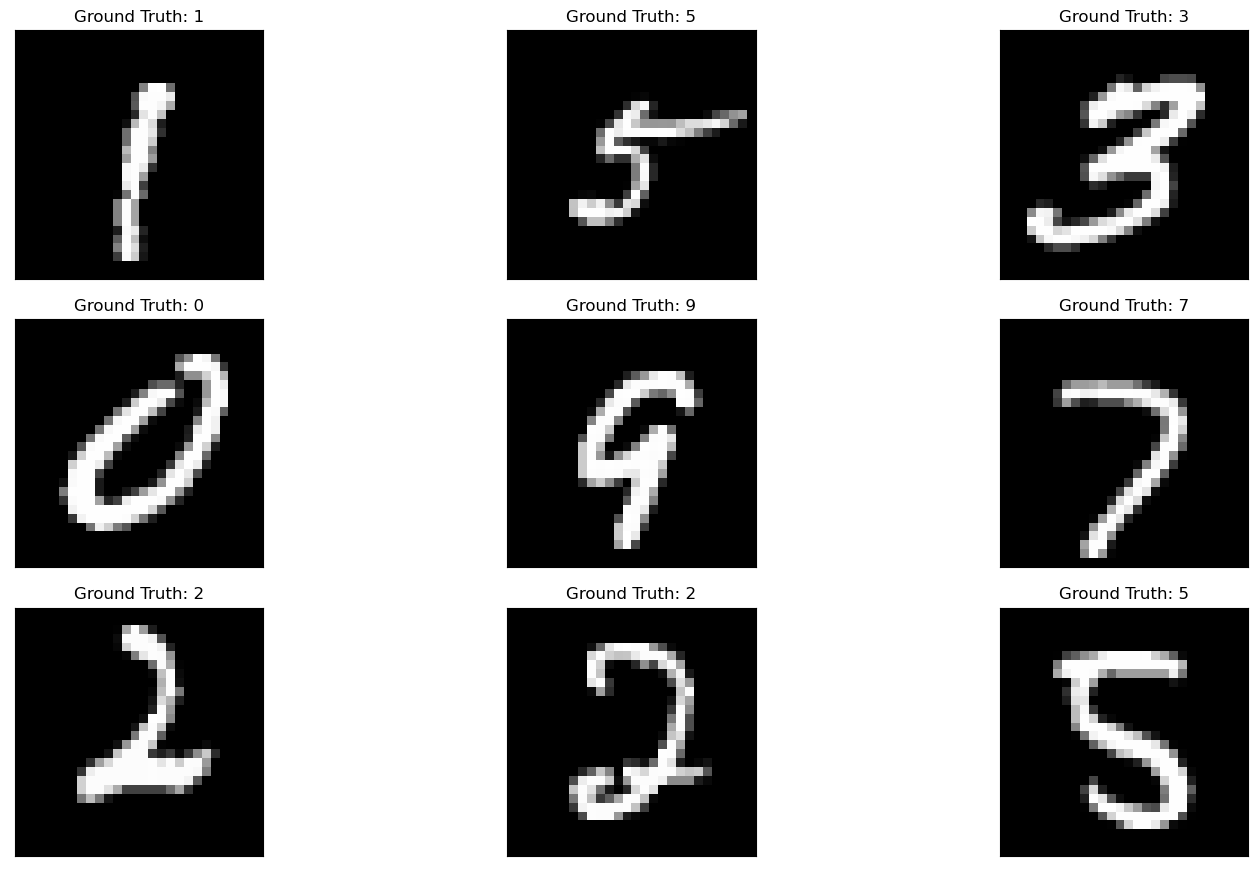

In [29]:
img_size = 28  # 32
im_width = img_size
im_height = img_size
im_chan = 1  # 3

fig = plt.figure(figsize=(16, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.tight_layout()
    digit = pixel_data[i]
    plt.title("Ground Truth: {}".format(digit.target.item()))
    plt.xticks([])
    plt.yticks([])
    A = digit.orig_image  # .view(im_height, im_width, im_chan)
    # A = A.numpy()
    # A = np.reshape(A, (im_height, im_width, im_chan), order='F')
    # A = A / 2 + 0.5  # unnormalize
    # plt.imshow(np.transpose(A, (1, 0, 2)))
    plt.imshow(A, cmap='gray', interpolation='none')
plt.show()

In [23]:

from torch_geometric.loader import DataLoader
from GNN_image_pixel import GNN_image_pixel

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_dl = DataLoader(pixel_data, batch_size=opt['batch_size'], shuffle=True)
for batch_idx, batch in enumerate(train_dl):
    break
batch.to(device)
edge_index_gpu = batch.edge_index
edge_attr_gpu = batch.edge_attr
if edge_index_gpu is not None: edge_index_gpu.to(device)
if edge_attr_gpu is not None: edge_index_gpu.to(device)

model = GNN_image_pixel(opt, batch, opt.get('num_class'), device).to(device)
# summary(model)

In [24]:
from run_image_pixel import get_optimizer

parameters = [p for p in model.parameters() if p.requires_grad]
optimizer = get_optimizer(opt['optimizer'], parameters, lr=opt['lr'], weight_decay=opt['decay'])

In [25]:
from run_image_pixel import pixel_test, train
import time

# best_val_acc = test_acc = best_epoch = 0
for epoch in range(opt['epoch']):
    print("Epoch {}".format(epoch))
    start_time = time.time()
    loss = train(model, optimizer, pixel_data)
    test_acc = pixel_test(model, pixel_data.data, batchorTest="test", trainorTest="test")

    log = 'Epoch: {:03d}, Runtime {:03f}, Loss {:03f}, forward nfe {:d}, backward nfe {:d}, Test: {:.4f}'
    print(log.format(epoch, time.time() - start_time, loss, model.fm.sum, model.bm.sum, test_acc))

Epoch 0
Batch Index: 0, Runtime 0.046899, Loss nan, forward nfe 64, backward nfe 64, Train: 0.7665, Test: 0.9234
Batch Index: 1, Runtime 0.036049, Loss nan, forward nfe 256, backward nfe 128, Train: 0.7805, Test: 0.9308
Batch Index: 2, Runtime 0.035741, Loss nan, forward nfe 448, backward nfe 192, Train: 0.7574, Test: 0.9208
Batch Index: 3, Runtime 0.035583, Loss nan, forward nfe 640, backward nfe 256, Train: 0.7574, Test: 0.9216


/opt/homebrew/Caskroom/miniconda/base/envs/grand/lib/python3.8/site-packages/torch_geometric/deprecation.py:12: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)
/opt/homebrew/Caskroom/miniconda/base/envs/grand/lib/python3.8/site-packages/torchdiffeq/_impl/misc.py:11: UserWarning: RK4: Unexpected arguments {'max_iters': 5000}
  warnings.warn('{}: Unexpected arguments {}'.format(solver.__class__.__name__, unused_kwargs))
/Users/jvs47/Documents/University/GraphAlgo/graph-neural-pde/src/run_image_pixel.py:140: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646603923/work/aten/src/ATen/native/TensorShape.cpp:3281.)
  total_

Batch Index: 4, Runtime 0.036410, Loss nan, forward nfe 832, backward nfe 320, Train: 0.7314, Test: 0.9128
Batch Index: 5, Runtime 0.036703, Loss nan, forward nfe 1024, backward nfe 384, Train: 0.7642, Test: 0.9249
Batch Index: 6, Runtime 0.035644, Loss nan, forward nfe 1216, backward nfe 448, Train: 0.7574, Test: 0.9208
Batch Index: 7, Runtime 0.036474, Loss nan, forward nfe 1408, backward nfe 512, Train: 0.7688, Test: 0.9242
Batch Index: 8, Runtime 0.035949, Loss nan, forward nfe 1600, backward nfe 576, Train: 0.7529, Test: 0.9246
Batch Index: 9, Runtime 0.036219, Loss nan, forward nfe 1792, backward nfe 640, Train: 0.7711, Test: 0.9282
Batch Index: 10, Runtime 0.036056, Loss nan, forward nfe 1984, backward nfe 704, Train: 0.7829, Test: 0.9309
Batch Index: 11, Runtime 0.036821, Loss nan, forward nfe 2176, backward nfe 768, Train: 0.7642, Test: 0.9265
Batch Index: 12, Runtime 0.035910, Loss nan, forward nfe 2368, backward nfe 832, Train: 0.7642, Test: 0.9241
Batch Index: 13, Runtime 0

/var/folders/bj/d6_yqspd3m16t2ljbs_sb4sm0000gp/T/ipykernel_51467/2293207059.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  r_pixel_labels = r_pixel_labels.astype(np.int)


<Figure size 1600x900 with 0 Axes>

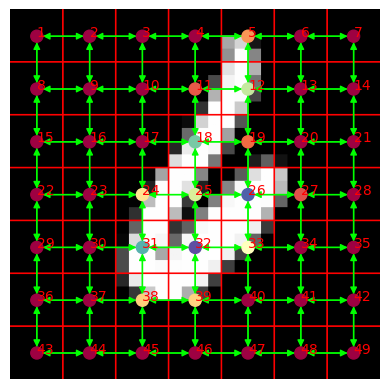

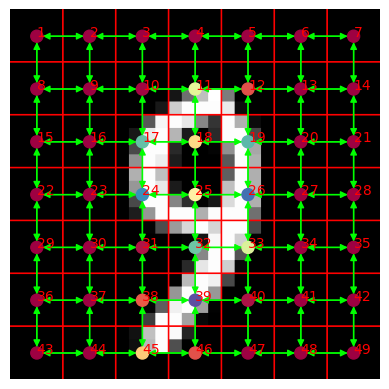

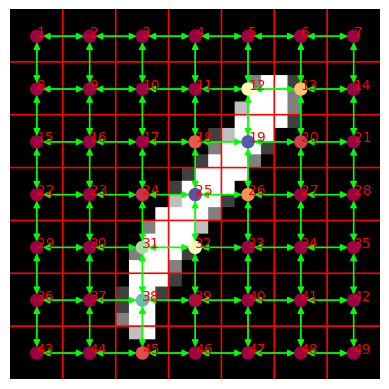

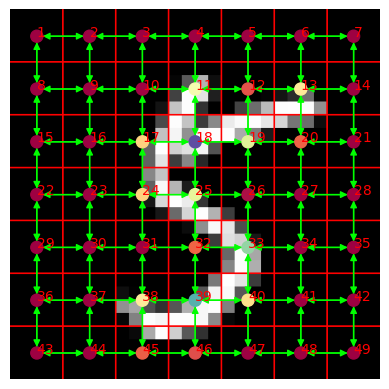

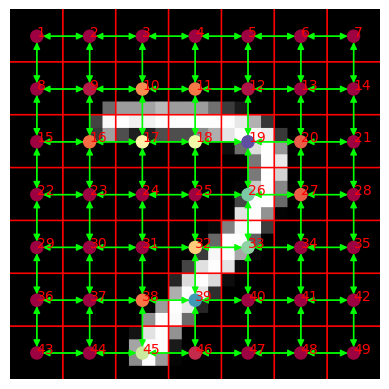

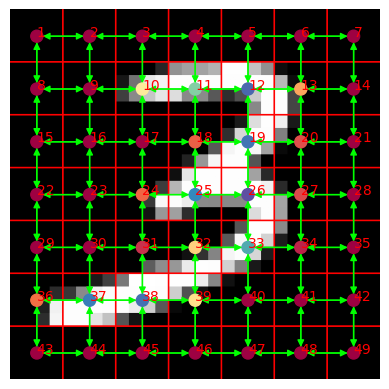

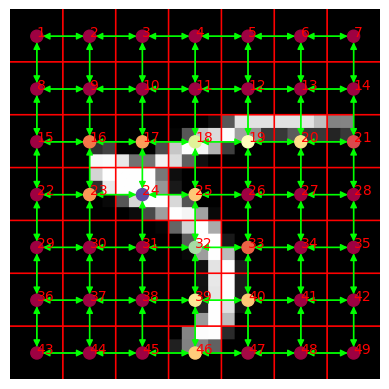

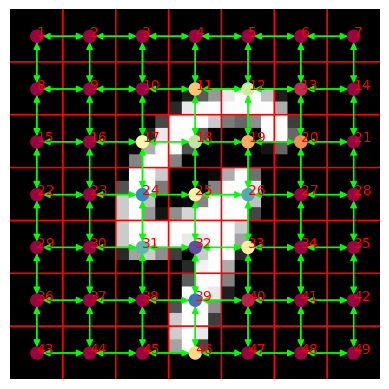

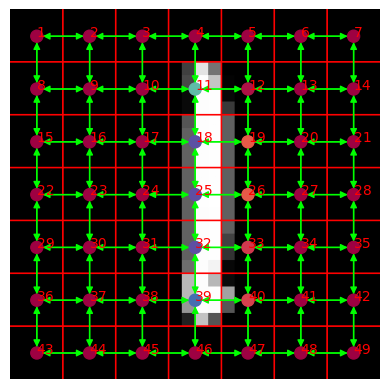

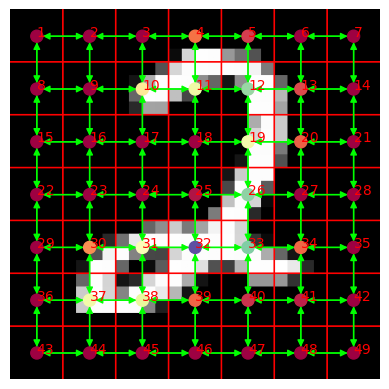

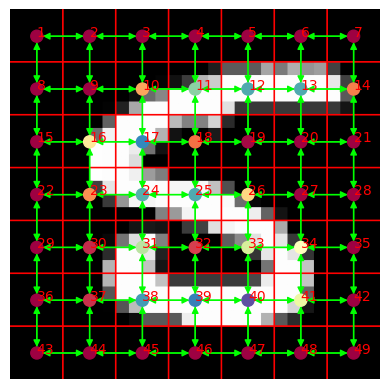

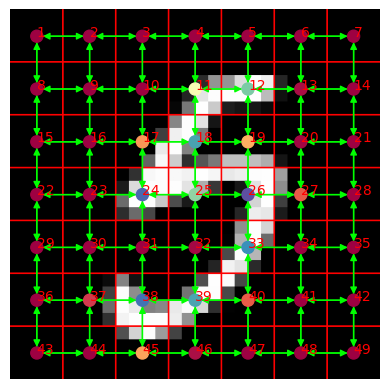

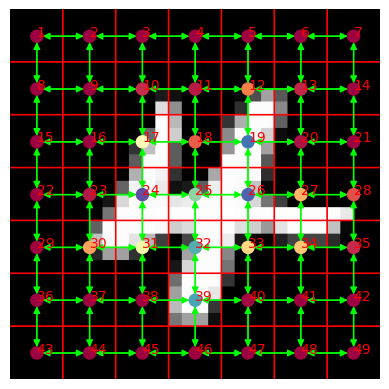

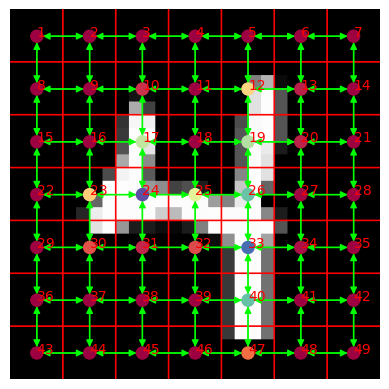

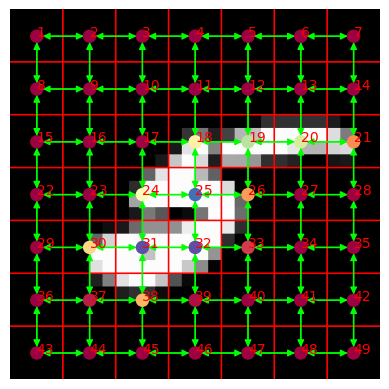

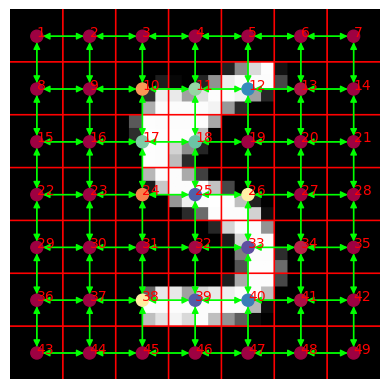

In [26]:
import networkx as nx
from torch_geometric.utils import to_networkx
from skimage import segmentation
from MNIST_SuperPix import transform_objects, get_centroid_coords_array


def view_SuperPix(super_pix_set, opt):
    im_height = opt['im_height']
    im_width = opt['im_width']
    # RESIZING
    SF = 448  # 56 #480  # 480    #needed as mark_boundaries marks 1 pixel wide either side of boundary
    heightSF = SF / im_height
    widthSF = SF / im_width

    fig = plt.figure(figsize=(16, 9))
    for i, idx in enumerate(np.random.choice(super_pix_set[0].x.shape[0], size=16, replace=False)):
        super_pix = super_pix_set[idx]
        pixel_values = super_pix.orig_image.detach().numpy()
        pixel_labels = super_pix.pixel_labels.view(im_height, im_width)
        x = super_pix.x
        centroids = super_pix.centroids
        num_centroids = torch.max(pixel_labels) + 1
        r_pixel_values, r_pixel_labels, r_centroids = transform_objects(im_height, im_width, heightSF, widthSF,                      pixel_values, pixel_labels.detach().numpy(),                    centroids)
        r_y_coords, r_x_coords = get_centroid_coords_array(num_centroids, r_centroids)

        # SEGMENTATION
        r_pixel_labels = r_pixel_labels.astype(np.int)
        out = segmentation.mark_boundaries(r_pixel_values, r_pixel_labels, (1, 0, 0))

        fig, ax = plt.subplots()
        # ax = fig.add_subplot(4, 1, i + 1, xticks=[], yticks=[])
        # fig, (ax, cbar_ax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios": [1, 0.05]})
        ax.axis('off')  # , cbar_ax.axis('off')
        ax.imshow(out)
        for i in range(num_centroids):
            ax.annotate(i, (r_x_coords[i], r_y_coords[i]), c="red")
        ax.scatter(x=r_x_coords, y=r_y_coords)

        NXgraph = to_networkx(super_pix)
        nx.draw(NXgraph, r_centroids, ax=ax, node_size=300 / 4, edge_color="lime",
                node_color=x, cmap=plt.get_cmap('Spectral'))
        # fig.colorbar(cm.ScalarMappable(cmap=plt.get_cmap('Spectral')),
        #              cax=cbar_ax, orientation="vertical")
        # plt.show()

view_SuperPix(pixel_data, opt)